# Library

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

# Load data and make table

In [49]:
#import the datasets
house_price_datasets = sklearn.datasets.load_boston()
#print(house_price_datasets)

/Users/anthonyhuang/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [50]:
# Loading the dataset to a Pandas DataFrame
house_price_data = pd.DataFrame(house_price_datasets.data , columns = house_price_datasets.feature_names)

In [51]:
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
# add the target (price) column to the DataFrame
house_price_data['price'] = house_price_datasets.target
house_price_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [53]:
house_price_data.shape

(506, 14)

In [5]:
#statistical measures of the dataset
house_price_data.describe()

NameError: name 'house_price_data' is not defined

In [4]:
correlation = house_price_data.corr()
sns.heatmap(correlation,cbar= True , square = True,fmt ='.1f', annot = True,cmap = 'Blues') 

NameError: name 'house_price_data' is not defined

# TRAIN and TESTING 

In [56]:
X = house_price_data.drop(columns = 'price', axis = 1)
Y = house_price_data['price']

In [57]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.45, random_state = 0)

# Model Training 

In [58]:
#Create model 
model = XGBRegressor()
model.fit(X_train,Y_train)
training_prediction = model.predict(X_train)

# R squared error
score_1 = metrics.r2_score(Y_train, training_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_prediction)

print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  0.9999999098954326
Mean Absolute Error :  0.0020317907813642826


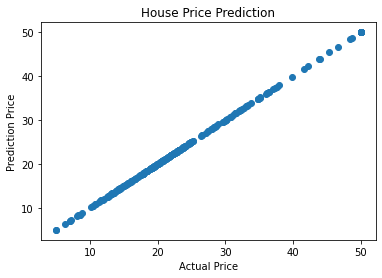

In [59]:
plt.scatter(Y_train, training_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("House Price Prediction")
plt.show()

# Testing and Evaluation


In [60]:
prediction = model.predict(X_test)
score1 = metrics.r2_score(Y_test, prediction)
score2 = metrics.mean_absolute_error(Y_test,prediction)
print("R squared error : ", score1)
print('Mean Absolute Error : ', score2)

R squared error :  0.8221594405593794
Mean Absolute Error :  2.474528848079213


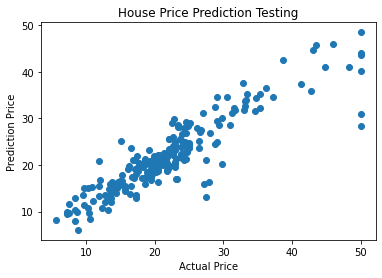

In [61]:
plt.scatter(Y_test,prediction)
plt.xlabel("Actual Price")
plt.ylabel("Prediction Price")
plt.title("House Price Prediction Testing")
plt.show()